<a href="https://colab.research.google.com/github/ZinaTlish/DZ-DA/blob/main/%D0%94%D0%974%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

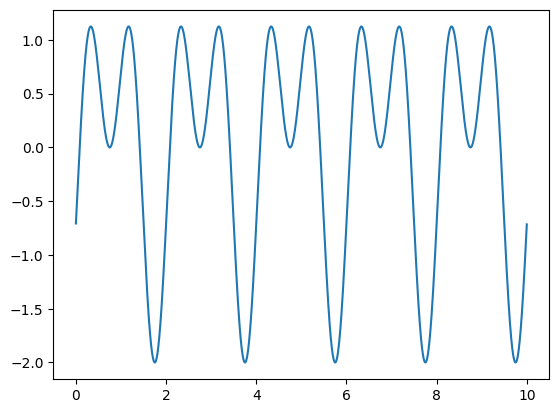

In [ ]:
t = np.arange(0,10,0.001)
signal = np.sin(2*np.pi*t)+np.sin(2*np.pi*t/2-np.pi/4)
plt.plot(t,signal)

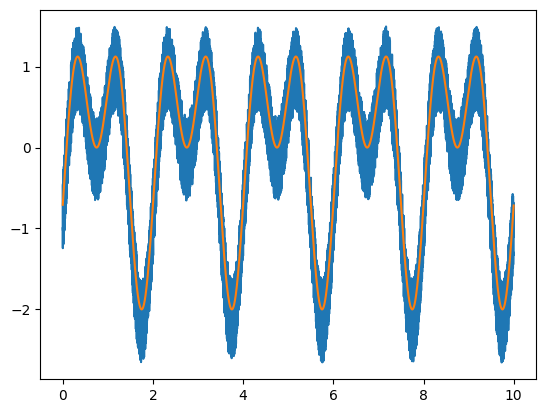

In [ ]:
n = np.random.uniform(np.min(signal)/3, np.max(signal)/3, len(t))
sn = signal+n
plt.plot(t,sn)
plt.plot(t,signal)

In [ ]:
def kalman_filter(measurements, initial_state=0, process_variance=1, measurement_variance=1):
    state = initial_state
    state_estimate = initial_state
    estimate_error = 1

    filtered_states = []

    for measurement in measurements:
        prediction = state_estimate
        prediction_error = estimate_error + process_variance

        kalman_gain = prediction_error / (prediction_error + measurement_variance)
        state_estimate = prediction + kalman_gain * (measurement - prediction)
        estimate_error = (1 - kalman_gain) * prediction_error

        state = state_estimate
        filtered_states.append(state)

    return np.array(filtered_states)

In [ ]:
initial_state_guess = 0
process_variance = 0.00001
measurement_variance = 0.01

In [ ]:
filtered_states = kalman_filter(sn, initial_state_guess, process_variance, measurement_variance)

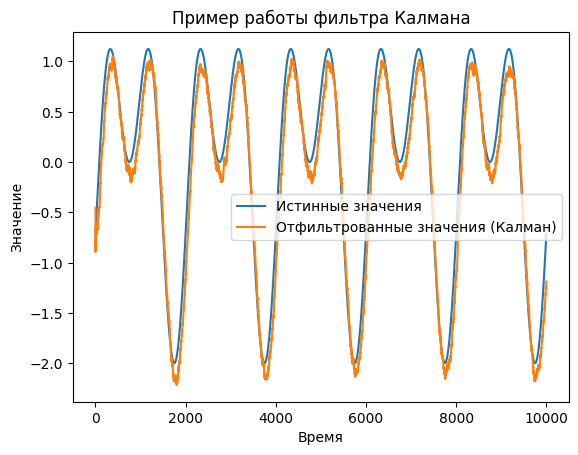

In [ ]:
plt.plot(signal, label='Истинные значения')
plt.plot(filtered_states, label='Отфильтрованные значения (Калман)')
plt.legend()
plt.title('Пример работы фильтра Калмана')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()
